In [1]:
import os, sys
import io
import requests
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage as ski

# A notebook to look at an image

In [2]:
os.environ['no_proxy']='10.68.0.250.nip.io'

# L'adresse du serveur d'image JPEG
SERVER_URL = 'http://imgserver.10.68.0.250.nip.io'

# Le répertoire parent sur ce serveur ou chercher des images.
ROOT_PATH ='/data/andra'

In [3]:
def get_list(img_path):
    """
    Récupère la liste des noms des images jpeg à partir d'un répertoire racine.
    :param img_path: le chemin racine à partir duquel faire la recherche des images jpeg
    :return: la liste des images jpeg collectée récursivement
    """
    url = SERVER_URL + "/list"
    header = {
        'img_path': img_path
    }
    response = requests.get(url, headers=header)
    code = response.status_code
    print("Status Code", code)
    if code != 200:
        raise Exception(f"no jpg found at {url} ({img_path})")

    files = response.json()
    return files


def get_file(filename):
    """
    Retour une Image (PIL) lue à partir d'un fichier jpeg de la liste
    :param filename: le chemin complet vers le fichier jpeg comme retournée par get_list
    :return: une image (PIL)
    """
    from PIL import Image
    url = SERVER_URL + "/file"
    header = {
        'filename': filename,
        'Content-type': 'image/jpeg'
    }
    response = requests.get(url, headers=header)
    code = response.status_code
    print("Status Code", code)
    if code == 200:
        return Image.open(io.BytesIO(response.content))

Status Code 200
nombre de fichiers disponibles 227
/data/andra/Photos/FUG2020-06_0009-OHZ7120_0437_0537.jpg
/data/andra/Photos/FUG2020-06_0009-OHZ7120_0074_0196.jpg
/data/andra/Photos/FUG2020-06_0009-OHZ6322_0931_1043.jpg
/data/andra/Photos/FUG2020-06_0009-OHZ7120_1497_1614.jpg
/data/andra/Photos/FUG2020-06_0009-OHZ6322_0257_0377.jpg
/data/andra/Photos/FUG2020-07_0009-OHZ7000_2997_3117.jpg
/data/andra/Photos/FUG2020-07_0009-OHZ7000_3241_3305.jpg
/data/andra/Photos/FUG2020-07_0009-OHZ7000_1858_1980.jpg
/data/andra/Photos/FUG2020-08_0009-OHZ6300_0776_0875.jpg
/data/andra/Photos/FUG2020-06_0009-OHZ7120_3457_3547.jpg
Status Code 200
image /data/andra/Photos/FUG2020-06_0009-OHZ6322_1501_1613.jpg(43) de taille (5183, 974)


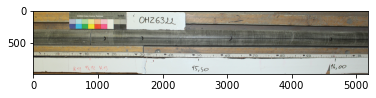

In [4]:
files = get_list(ROOT_PATH)
print("nombre de fichiers disponibles", len(files))
for i in range(10):
    print(files[i])

idx = int(random.random()*len(files))

img = get_file(files[idx])
print(f"image {files[idx]}({idx}) de taille {img.size}")
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

Convert image to numpy array to have a look at it

In [5]:
image = np.array(img)

Plot the red, green, and blue channels to see if the core is easily recognised

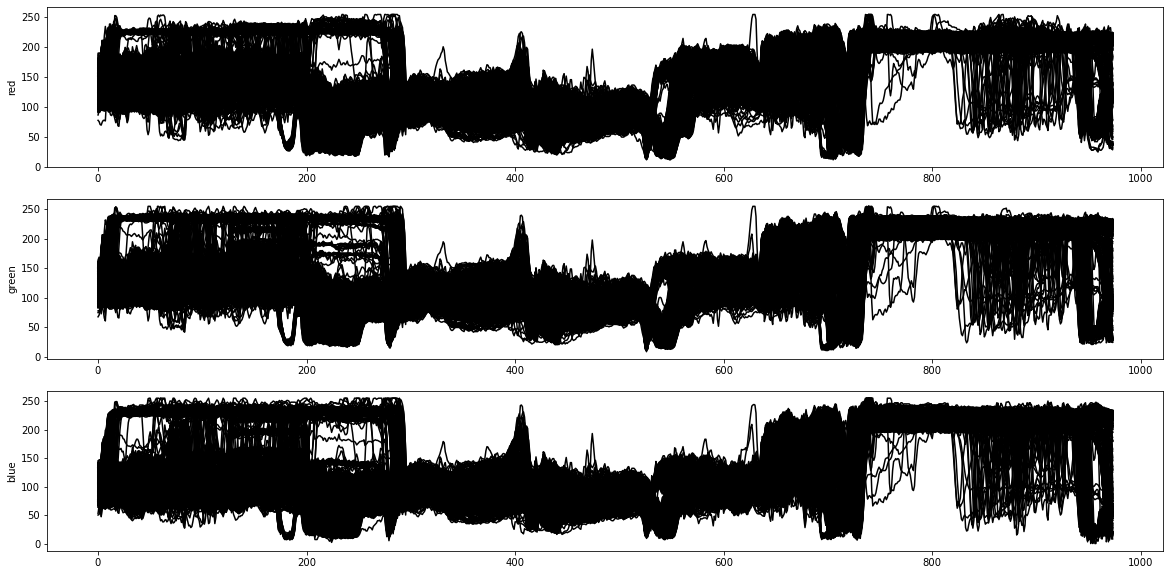

In [6]:
colors = ('red', 'green', 'blue')
channel_ids = [0, 1, 2]

plt.figure(figsize=[20,10])
for row in range(0, np.shape(image)[1], 10):
    for channel_id in channel_ids:
        plt.subplot(3, 1, channel_id + 1)
        plt.plot(image[:, row, channel_id], 'k')
for channel_id in channel_ids:
    plt.subplot(3, 1, channel_id + 1)
    plt.ylabel(colors[channel_id])
plt.show()

Status Code 200
image /data/andra/Photos OHZ1304/GTR2010-01_0002_OHZ1304_1900_1950.jpg(201) de taille (1830, 630)


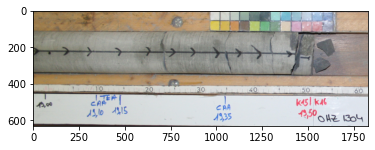

In [7]:
idx = int(random.random()*len(files))

img = get_file(files[idx])
print(f"image {files[idx]}({idx}) de taille {img.size}")
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

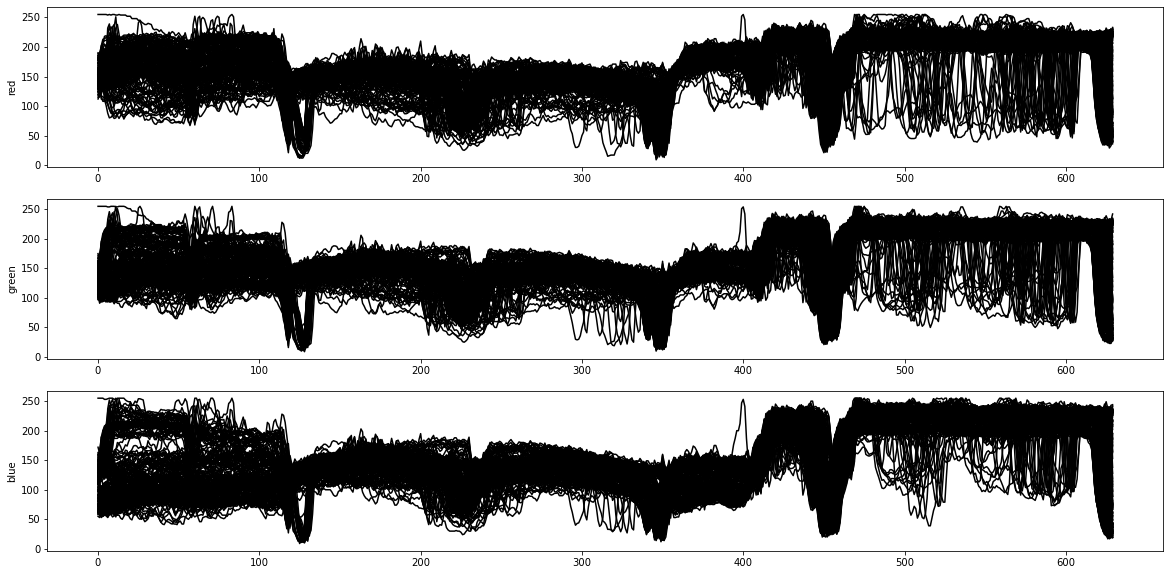

In [8]:
image = np.array(img)

plt.figure(figsize=[20,10])
for row in range(0, np.shape(image)[1], 10):
    for channel_id in channel_ids:
        plt.subplot(3, 1, channel_id + 1)
        plt.plot(image[:, row, channel_id], 'k')
for channel_id in channel_ids:
    plt.subplot(3, 1, channel_id + 1)
    plt.ylabel(colors[channel_id])
plt.show()